In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data_raw = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data_raw.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Data Cleaning**

In [5]:
train_data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data_raw[train_data_raw["Age"].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
train_data = train_data_raw.copy()

In [8]:
train_data["HasCabin"] = train_data["Cabin"].notnull().astype(int)
train_data = train_data.drop("Cabin", axis=1)
train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [9]:
test_data["HasCabin"] = test_data["Cabin"].notnull().astype(int)
test_data = test_data.drop("Cabin", axis=1)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,0


In [10]:
train_data["Embarked"] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data["Embarked"] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [11]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female":1})
train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,0


In [12]:
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female":1})
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,S,0


In [13]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [14]:
embarked_dummies = pd.get_dummies(train_data["Embarked"], prefix="Embarked", dtype=int)
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data = train_data.drop('Embarked', axis=1)
train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0,1
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,1,0,0


In [15]:
embarked_dummies = pd.get_dummies(test_data["Embarked"], prefix="Embarked", dtype=int)
test_data = pd.concat([test_data, embarked_dummies], axis=1)
test_data = test_data.drop('Embarked', axis=1)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,0,0,0,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,0,0,0,1


In [16]:
train_data = train_data.drop("Ticket", axis=1)
test_data = test_data.drop("Ticket", axis=1)

In [17]:
train_data["Title"] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [18]:
test_data["Title"] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [19]:
title_map = {
    'Ms':'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Mr',
    'Dona': 'Mrs',
    'Dr': 'rare',
    'Rev': 'rare',
    'Major': 'rare',
    'Col': 'rare',
    'Countess': 'rare',
    'Capt': 'rare',
    'Sir': 'rare',
    'Lady': 'rare',
    'Jonkheer': 'rare'
}
train_data["Title"] = train_data["Title"].replace(title_map)
test_data["Title"] = test_data["Title"].replace(title_map)

test_data["Title"].value_counts()

Title
Mr        240
Miss       79
Mrs        73
Master     21
rare        5
Name: count, dtype: int64

In [20]:
train_data = train_data.drop('Name', axis=1)
test_data = test_data.drop('Name', axis=1)

train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0,0,1,Mr
1,2,1,1,1,38.0,1,0,71.2833,1,1,0,0,Mrs
2,3,1,3,1,26.0,0,0,7.9250,0,0,0,1,Miss
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,1,Mrs
4,5,0,3,0,35.0,0,0,8.0500,0,0,0,1,Mr
5,6,0,3,0,NaN,0,0,8.4583,0,0,1,0,Mr
6,7,0,1,0,54.0,0,0,51.8625,1,0,0,1,Mr
7,8,0,3,0,2.0,3,1,21.0750,0,0,0,1,Master
8,9,1,3,1,27.0,0,2,11.1333,0,0,0,1,Mrs
9,10,1,2,1,14.0,1,0,30.0708,0,1,0,0,Mrs


In [21]:
title_dummies = pd.get_dummies(train_data['Title'], prefix='Title', dtype=int)
train_data = pd.concat([train_data, title_dummies], axis=1)

In [22]:
title_dummies = pd.get_dummies(test_data['Title'], prefix='Title', dtype=int)
test_data = pd.concat([test_data, title_dummies], axis=1)

In [23]:
train_data['Age'] = train_data.groupby(["Title", "Pclass", "Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
train_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
HasCabin        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_rare      0
dtype: int64

In [24]:
test_data['Age'] = test_data.groupby(["Title", "Pclass", "Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            1
HasCabin        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_rare      0
dtype: int64

In [25]:
test_data['Fare'] = test_data.groupby(["Title", "Pclass", "Sex"])['Fare'].transform(lambda x: x.fillna(x.median()))
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
HasCabin        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_rare      0
dtype: int64

In [26]:
train_data = train_data.drop('Title', axis=1)
test_data = test_data.drop('Title', axis=1)

train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_rare
0,1,0,3,0,22.0,1,0,7.2500,0,0,0,1,0,0,1,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1,0,0,0,0,0,1,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,0,1,0,1,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0,0,1,0,0,1,0,0
5,6,0,3,0,26.0,0,0,8.4583,0,0,1,0,0,0,1,0,0
6,7,0,1,0,54.0,0,0,51.8625,1,0,0,1,0,0,1,0,0
7,8,0,3,0,2.0,3,1,21.0750,0,0,0,1,1,0,0,0,0
8,9,1,3,1,27.0,0,2,11.1333,0,0,0,1,0,0,0,1,0
9,10,1,2,1,14.0,1,0,30.0708,0,1,0,0,0,0,0,1,0


In [27]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['TraveledAlone'] = (train_data['FamilySize'] == 1).astype(int)
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_rare,FamilySize,TraveledAlone
0,1,0,3,0,22.0,7.2500,0,0,0,1,0,0,1,0,0,2,0
1,2,1,1,1,38.0,71.2833,1,1,0,0,0,0,0,1,0,2,0
2,3,1,3,1,26.0,7.9250,0,0,0,1,0,1,0,0,0,1,1
3,4,1,1,1,35.0,53.1000,1,0,0,1,0,0,0,1,0,2,0
4,5,0,3,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,1,1
5,6,0,3,0,26.0,8.4583,0,0,1,0,0,0,1,0,0,1,1
6,7,0,1,0,54.0,51.8625,1,0,0,1,0,0,1,0,0,1,1
7,8,0,3,0,2.0,21.0750,0,0,0,1,1,0,0,0,0,5,0
8,9,1,3,1,27.0,11.1333,0,0,0,1,0,0,0,1,0,3,0
9,10,1,2,1,14.0,30.0708,0,1,0,0,0,0,0,1,0,2,0


In [28]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['TraveledAlone'] = (test_data['FamilySize'] == 1).astype(int)
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_rare,FamilySize,TraveledAlone
0,892,3,0,34.5,7.8292,0,0,1,0,0,0,1,0,0,1,1
1,893,3,1,47.0,7.0000,0,0,0,1,0,0,0,1,0,2,0
2,894,2,0,62.0,9.6875,0,0,1,0,0,0,1,0,0,1,1
3,895,3,0,27.0,8.6625,0,0,0,1,0,0,1,0,0,1,1
4,896,3,1,22.0,12.2875,0,0,0,1,0,0,0,1,0,3,0
5,897,3,0,14.0,9.2250,0,0,0,1,0,0,1,0,0,1,1
6,898,3,1,30.0,7.6292,0,0,1,0,0,1,0,0,0,1,1
7,899,2,0,26.0,29.0000,0,0,0,1,0,0,1,0,0,3,0
8,900,3,1,18.0,7.2292,0,1,0,0,0,0,0,1,0,1,1
9,901,3,0,21.0,24.1500,0,0,0,1,0,0,1,0,0,3,0


# **EDA**

In [29]:
women = train_data_raw.loc[train_data_raw['Sex'] == 'female']['Survived']
women_survival_rate = (sum(women)/len(women)) * 100
women_survival_rate

74.20382165605095

In [30]:
men = train_data_raw.loc[train_data_raw["Sex"] == "male"]["Survived"]
men_survival_rate = (sum(men)/len(men)) *100
print(men_survival_rate)

18.890814558058924


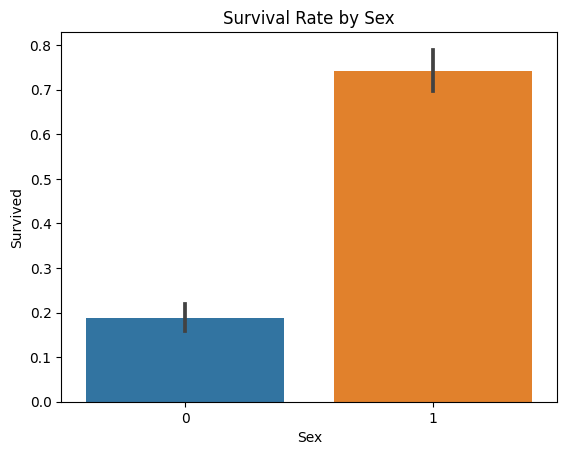

In [31]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title("Survival Rate by Sex")
plt.show()

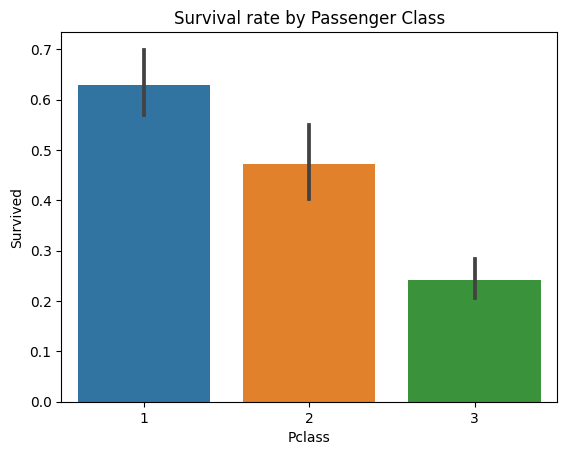

In [32]:
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Survival rate by Passenger Class")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


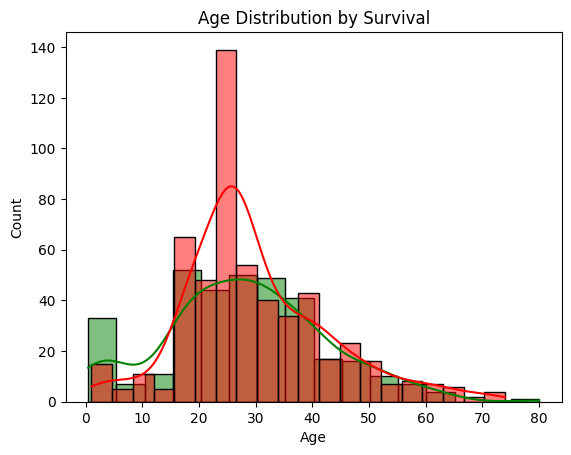

In [33]:
sns.histplot(train_data[train_data["Survived"] == 1]["Age"], color='green', label='Survived', kde=True)
sns.histplot(train_data[train_data["Survived"] == 0]["Age"], color='red', label='Did Not Survive', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

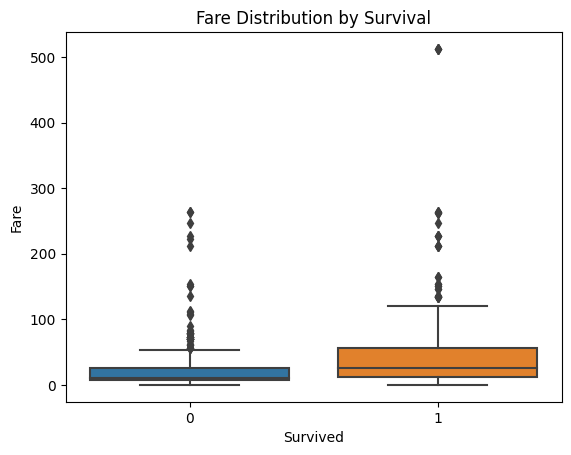

In [34]:
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare Distribution by Survival')
plt.show()

In [35]:
(train_data['Fare']>300).sum()

3

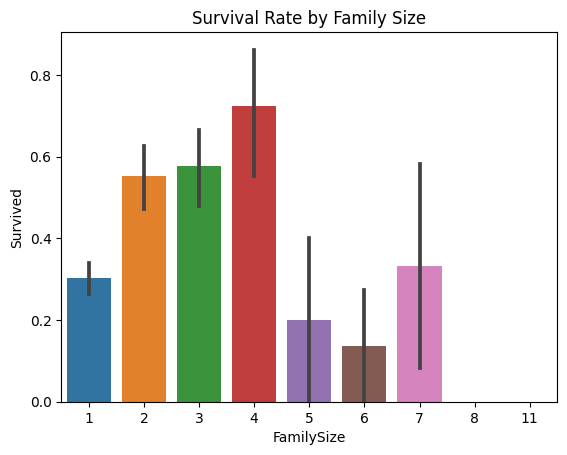

In [36]:
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.show()

<Axes: >

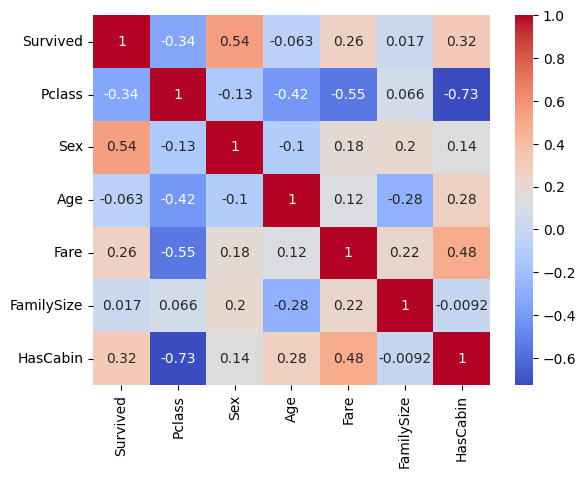

In [37]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'HasCabin']
sns.heatmap(train_data[cols].corr(), annot=True, cmap='coolwarm')

# **Modeling**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_data.drop(['Survived', 'PassengerId'], axis = 1)
y = train_data['Survived']
X_test = test_data.drop(['PassengerId'], axis = 1)
passenger_id = test_data['PassengerId']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, y_train = X_scaled, y

X_test = scaler.fit_transform(X_test)

## Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_lr = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best Parameters:", grid_search_lr.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_lr.best_score_)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8327663046889711


## Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.8316364321134895


In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search_xgb = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.8383654510074697


### Submission

In [42]:
best_model = grid_search_xgb.best_estimator_
predictions = best_model.predict(X_test)

In [43]:
submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": predictions  
})

submission.to_csv("submission.csv", index=False)